In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import random
import math
import time

In [7]:
#BRUTE FORCE

#globalna promenljiva za odabir rastojanja
distType = 'euclid'

def distance(i1 ,i2):
    if distType == 'euclid':
        #Euclid                
        squared_coord_diff_sum = 0    
        for field in i1._fields:        
            if field == "Index" or field == "Clusters":
                continue            
            else:
                squared_coord_diff = (getattr(i1, field) - getattr(i2, field))**2
                squared_coord_diff_sum = squared_coord_diff_sum + squared_coord_diff    
        distance = math.sqrt(squared_coord_diff_sum)                        
        return distance

    elif distType == 'manhattan':
        #manhattan distance
        total = 0
        for field in i1._fields:        
            if field == "Index" or field == "Clusters":
                continue            
            else:
                total  += abs(getattr(i1, field) - getattr(i2, field))

        return total


def calculateSum(data, cluster_num):
    sum = 0    
    for cl in range(0,cluster_num):

        cluster_data = data.loc[data["Cluster"] == cl]        
        cluster_sum = 0

        #distanca medju instancama u jednom klasteru
        #iteriramo kroz parove redova u klasteru sa poretkom da ne bismo ponavljali parove
        for namedTuple1 in cluster_data.itertuples():
            for namedTuple2 in cluster_data.itertuples():
                if namedTuple1[0] < namedTuple2[0]:
                    cluster_sum = cluster_sum + distance(namedTuple1, namedTuple2)

        sum = sum + cluster_sum    
    
    return sum

def brute_force_algorithm(data, cluster_num, variation_size, max_valid_number, current_variation, number_of_variations):
    
    best_sum = np.inf
    best_clustering = None
    test = np.arange(0, cluster_num) #koristi se za proveru da li ni jedan klaster nije prazan

    while True:

        #za proveru da li su pokrivene sve vrijacije
        number_of_variations = number_of_variations + 1

        check_mask = np.in1d(test, current_variation)

        #proveravamo da li ni jedan klaster nije prazan
        if np.add.reduce(check_mask) == cluster_num:

            data["Cluster"] = current_variation  #postavljamo klastere
            current_sum = calculateSum(data, cluster_num)  #racunamo novu sumu

            #ako smo dobili bolje klasterovanje pamtimo ga i azurirmao tekucu najbolju sumu
            if best_sum > current_sum:
                best_sum = current_sum
                best_clustering = np.copy(current_variation)

        #generisemo sledecu varijaciju po leksikografskom poretku
        #iteriramo unazad kroz varijaciju do jednog mesta ispred prvog (pozicija -1)
        for i in range(variation_size - 1, -2, -1):
            if i >= 0 and current_variation[i] == max_valid_number:
                current_variation[i] = 0
            else:
                turning_point = i
                break

        if turning_point < 0:  #dosli smo do poslednje varijacije u leksikografskom poretku
            print("kraj")
            print(number_of_variations)
            break
        else:  #nasli smo poziciju koju mozemo da uvecamo za 1
            current_variation[turning_point] = current_variation[turning_point] + 1
    
    data["Cluster"] = best_clustering
    
    return best_sum


#load data
data = pd.read_csv("./dogs.csv")
data = data.drop(columns='breed')

#num of cluster input
cluster_num = int(input('Broj klastera: '))

row_num = data.shape[0]

variation_size = row_num
max_valid_number = cluster_num - 1

Broj klastera:  3


In [8]:
#inicijalizujemo pocetnu varijaciju
inital_variation = np.full(variation_size, 0)
current_variation = inital_variation
number_of_variations = 0
#postavljamo rastojanje na euklidsko
distType = 'euclid'

In [9]:
start_time = time.process_time()
resulting_sum = brute_force_algorithm(data, cluster_num, variation_size, max_valid_number, current_variation, number_of_variations)
end_time = time.process_time()

kraj
177147


In [10]:
#Zavrsno stanje
print("Minimalna suma: ", resulting_sum)
print("Vreme izvrsavanja: ", end_time - start_time)

Minimalna suma:  319.6229092201534
Vreme izvrsavanja:  934.90625


In [11]:
#racunamo siluetu
from sklearn.metrics import  silhouette_score
siluette = silhouette_score(data, data['Cluster'].tolist())
print("Silueta: ", siluette)

Silueta:  0.5426081945716705


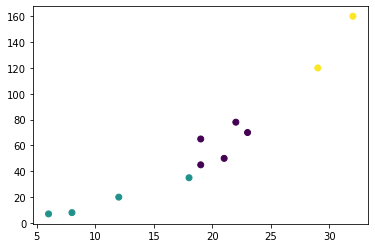

In [13]:
figure = plt.figure()
figure.add_subplot(1,1,1)
plt.scatter(data['height'].tolist(), data['weight'].tolist(), c = list(data['Cluster']))

In [15]:
#inicijalizujemo pocetnu varijaciju
inital_variation = np.full(variation_size, 0)
current_variation = inital_variation
number_of_variations = 0
#postavljamo rastojanje na euklidsko
distType = 'manhattan'

In [16]:
start_time = time.process_time()
resulting_sum = brute_force_algorithm(data, cluster_num, variation_size, max_valid_number, current_variation, number_of_variations)
end_time = time.process_time()

kraj
177147


In [17]:
#Zavrsno stanje
print("Minimalna suma: ", resulting_sum)
print("Vreme izvrsavanja: ", end_time - start_time)

Minimalna suma:  373
Vreme izvrsavanja:  926.453125


In [18]:
#racunamo siluetu
siluette = silhouette_score(data, data['Cluster'].tolist())
print("Silueta: ", siluette)

Silueta:  0.5426081945716705


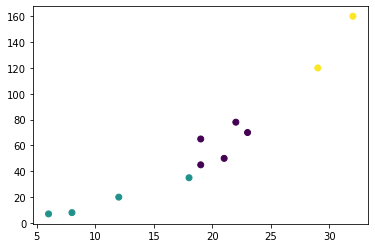

In [19]:
figure = plt.figure()
figure.add_subplot(1,1,1)
plt.scatter(data['height'].tolist(), data['weight'].tolist(), c = list(data['Cluster']))